## O PROBLEMA DE NEGÓCIO

**A Empresa Insurance All**

A Insurance All é uma empresa que fornece seguro de saúde para seus clientes e o time de produtos está analisando a possibilidade de oferecer aos assegurados, **um novo produto: Um seguro de automóveis.**

Assim como o seguro de saúde, os clientes desse novo plano de seguro de automóveis precisam pagar um valor anualmente à Insurance All para obter um valor assegurado pela empresa, destinado aos custos de um eventual acidente ou dano ao veículo.

A Insurance All fez uma **pesquisa** com cerca de **380 mil clientes** sobre o interesse em aderir a um novo produto de seguro de automóveis, no ano passado. Todos os clientes demonstraram interesse ou não em adquirir o seguro de automóvel e essas respostas ficaram salvas em um banco de dados junto com outros atributos dos clientes.

O time de produtos selecionou **127 mil novos clientes que não responderam a pesquisa** para participar de uma campanha, no qual receberão a oferta do novo produto de seguro de automóveis. A oferta será feita pelo time de vendas através de ligações telefônicas.
Contudo, o time de vendas tem uma **capacidade de realizar 20 mil ligações** dentro do período da campanha.

**OBJETIVO:**

- Ordenar uma lista de clientes mais propensos a aceitar o novo produto, pela limitada capacidade de ligações.
- Sendo um problema de Rankeamento.

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy                   import stats


%matplotlib inline 
# usar esse comando para não precisar dar plt.show em cada gráfico

plt.style.use('seaborn-v0_8-dark')

## Function

In [2]:

def plotvariable(df, var):
    
    """
    Funcao que plota grafico de boxplot e histograma,
    para verificar a distribuicao da variavel no conjunto de dados.
    """
    
    plt.figure(figsize=(15,7))

    plt.subplot(1,2,1)
    ax1 = sns.boxplot(y = df[var])

    plt.subplot(1,2,2)
    ax1 = sns.histplot(df[var])
    
    
def find_limites_boxplot(df, var):
    """
    Funcao que calcula o limite inferior e limite superior do boxplot
    """
    q1 = df[var].quantile(.25)
    q3 = df[var].quantile(.75)
    
    IQR = q3 - q1
    
    limite_inferior = q1 - 1.5 * IQR
    limite_superior = q3 + 1.5 * IQR
    
    return (f'O limite inferior é de {limite_inferior}. E o limite superior é de { limite_superior}')


def distrib_cat(df, var):
    ax = sns.countplot(x= var, data=df )
    ax.bar_label(ax.containers[0]);

    print(df[var].value_counts(normalize = True))
    

def cramer_v(x, y):
    '''Função para verificar a correlação entre as variáveis categóricas'''
    cm = pd.crosstab(x, y).to_numpy()
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = stats.chi2_contingency( cm )[0]
    
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )

    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    v = np.sqrt((chi2corr / n) / (min(kcorr - 1, rcorr-1)))
    
    return v

## Carregando os dados

In [3]:
df_raw = pd.read_csv('data/train.csv')

## Análise descritiva

Utiliza-se a estatística descritiva onde aplica-se várias técnicas com a finalidade de descrever e resumir um conjunto de dados. 

Algumas medidas que são normalmente usadas para descrever um conjunto de dados são medidas de **tendência central e medidas de variabilidade ou dispersão**. Medidas de tendência central incluem média, mediana e moda. Medidas de variabilidade incluem desvio padrão, variância, o valor máximo e mínimo, obliquidade e curtose.

- Exibindo uma amostra de 5 linhas dos dados

In [4]:
df_raw.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
30603,30604,Male,24,1,30.0,1,< 1 Year,No,26187.0,152.0,130,0
349287,349288,Female,37,1,28.0,0,1-2 Year,Yes,29593.0,26.0,119,1
120963,120964,Male,23,1,11.0,1,< 1 Year,No,22746.0,152.0,112,0
276600,276601,Male,29,1,36.0,0,< 1 Year,No,2630.0,160.0,269,0
260985,260986,Female,43,1,50.0,1,1-2 Year,No,22682.0,124.0,108,0


- Colocando os nomes das colunas em minusculo

In [5]:
colunas = df_raw.columns

new_cols = [i.lower() for i in colunas]

df_raw.columns = new_cols

**Descrição das colunas**

colunas | descrição
------ | -------
id | identificador único
gender | gênero do cliente
age | idade do cliente
driving license | 0: não permissão digirir, 1: permissão digirir
region code | código da região do cliente
Previously Insured | 0: não possui seguro automovel, 1: já possui seguro automovel
vehicle age | idade do veículo
vehicle damage | 0: nunca foi danificado, 1: já foi danificado no passado
anual premium | quantidade que irá pagar pelo seguro de automovel anual
policy sales channel | código anônimo do contato do cliente 
vintage | nº dias que o cliente associou à empresa
response | 0: não tem interesse ao seguro de automovel, 1: tem interesse ao seguro de automovel

- Dimensão dos dados

In [6]:
print(f'Total de linhas: {df_raw.shape[0]}')
print(f'Total de colunas: {df_raw.shape[1]}')

Total de linhas: 381109
Total de colunas: 12


- Verificando presença de valores ausentes nos dados

In [7]:
## Check NA
df_raw.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

- Verificando se há valores duplicados

In [8]:
## duplicate
df_raw[df_raw.duplicated()] # não há linhas duplicadas

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response


- Tipos de dados de cada coluna

In [9]:
df_raw.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

### **Análise estatística de variaveis numericas**

['age', 'region_code', 'annual_premium', 'policy_sales_channel', 'vintage']

- Tais atributos foram selecionados para obter estatística de tendência cetral e dispersão da distribuição dos dados.

    - TENDÊNCIA CENTRAL:
**média:** soma de um grupo de números e divide pela contagem desses números.

**mediana:** o número central de uma lista de dados organizados de forma crescente ou decrescente.
        
    -TENDÊNCIA DE DISPERSÃO:
**máximo:** o maior número no conjunto de dados.

**mínimo:** o menor número no conjunto de dados.

**amplitude:** é a diferença entre o maior e o menor valor observado. Sendo sensivel ao outliers.

**desvio padrão:** é dado pela raiz quadrada da variância. Uma medida de variabilidade dos dados.

**Assimetria:** é quando a distribuição não é simetria, ou seja, a média não é igual a mediana. Podendo ser positiva (enviesada a direita) ou negativa (enviesada a esquerda).

**Kurtosis:** É o grau de achatamento de uma distribuição, em relação a distribuição normal.
- valor = 0 -> igual uma distribuição normal
- valor > 0 -> a distribuição em questão é mais alta (afunilada) e concentrada que a distribuição normal
- valor < 0 -> distribuição é mais "achatada" que a distribuição normal.

In [10]:
## estatistic
# numeric
num_attributes = df_raw[['age', 'region_code', 'annual_premium', 'policy_sales_channel', 'vintage']]


# central tendency
# mean / median
c1 = pd.DataFrame(num_attributes.apply(np.mean)).T
c2 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion tendency
#max / min / range / std / sknew / kurtosi
d1 = pd.DataFrame(num_attributes.apply(np.max)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
d6 = pd.DataFrame(num_attributes.apply(np.std)).T

# concat
df_num = pd.concat([c1,c2,d1,d2,d3,d4,d5, d6]).T.reset_index()
df_num.columns = ['attribute', 'mean', 'median', 'max', 'min', 'range', 'skew', 'kurtosis', 'std']
df_num

,attribute,mean,median,max,min,range,skew,kurtosis,std
0,age,38.822584,36.0,85.0,20.0,65.0,0.672539,-0.565655,15.511591
1,region_code,26.388807,28.0,52.0,0.0,52.0,-0.115266,-0.867857,13.229871
2,annual_premium,30564.389581,31669.0,540165.0,2630.0,537535.0,1.766087,34.004569,17213.132474
3,policy_sales_channel,112.034295,133.0,163.0,1.0,162.0,-0.900008,-0.970810,54.203924
4,vintage,154.347397,154.0,299.0,10.0,289.0,0.003030,-1.200688,83.671194


**NOTA**

AGE
- Distribuição enviesada a direita, assimetria um pouco maior que zero.
- Média maior que mediana.

ANNUAL_PREMIUM
- Distribuição enviesada a direita, assimetria maior que zero.
- Média menor que mediana.

VINTAGE
- A assimetria está quase zero, 0,003030. 

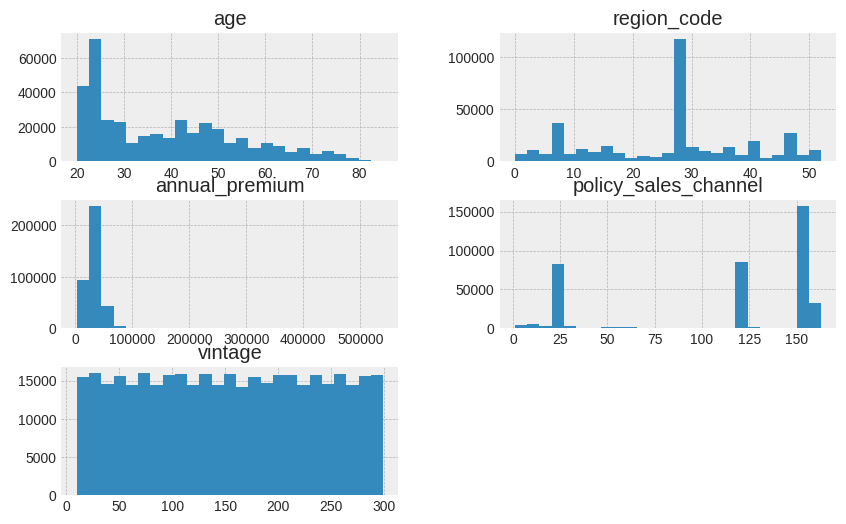

In [11]:
plt.rcParams['figure.figsize'] = [10, 6]
# plt.rcParams['font.size'] = 5
plt.style.use( 'bmh' )
num_attributes.hist(bins=25);

**Boxplot**

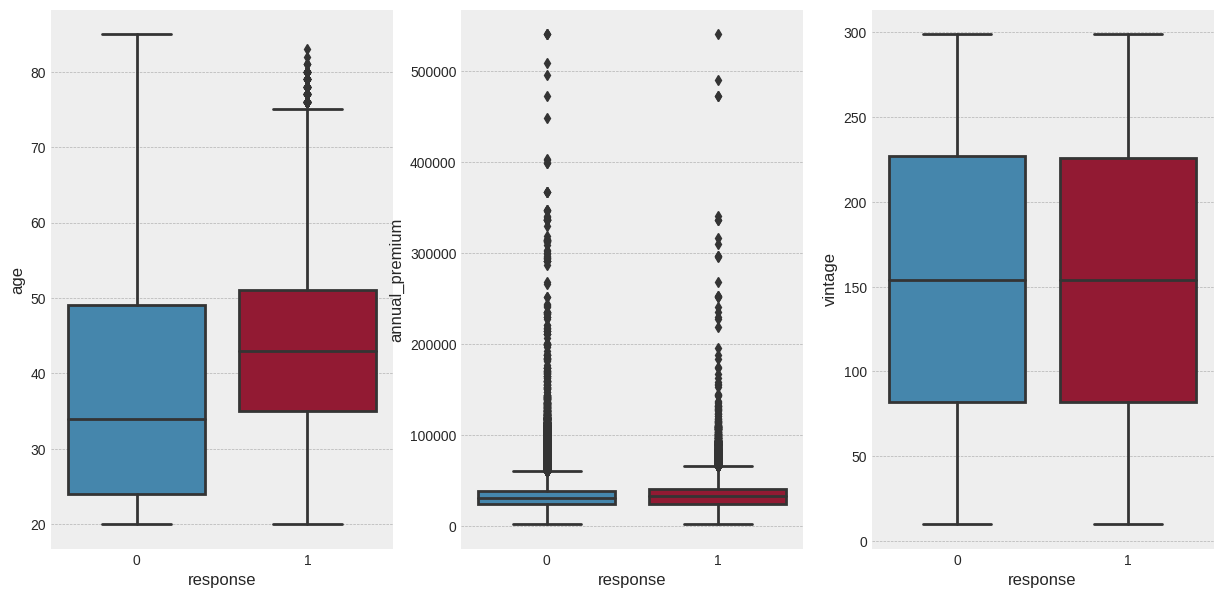

In [12]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,1)
ax1 = sns.boxplot(y = df_raw['age'], x=df_raw['response'])

plt.subplot(1,3,2)
ax2 = sns.boxplot(y = df_raw['annual_premium'], x=df_raw['response'])

plt.subplot(1,3,3)
ax3 = sns.boxplot(y = df_raw['vintage'], x=df_raw['response']);

**NOTA:**

Idéia da posição, dispersão, assimetria, caudas e dados discrepantes do conjunto de dados. 

- O boxplot é composto por um retangulo onde estão representados os quartis e a mediana.
- Quartis:
    - q(0,25): 1º quartil ou 25º percentil.
    - q(0,50): 2º quartil ou mediana ou 5º decil ou 50º percentil.
    - q(0,75): 3º quartil ou 75º percentil.

- Abaixo e a acima do retangulo estão representados o limite inferior e superior, sendo calculados LS=Q3+1.5*(Q3 -Q1) e  LI= Q1-1.5*(Q3-Q1), respectivamente. 
- As observações que estiverem acima do limite superior ou abaixo do limite inferior estabelecidos, são representados por asteriscos ou pontos. Podendo ser considerados outliers ou valores atípicos. 

### **Análise de variaveis categóricas**

['gender', 'driving_license','previously_insured', 'vehicle_age', 'vehicle_damage', 'response']

In [13]:
# categorical
cat_attributes = df_raw[['gender', 'driving_license','previously_insured', 'vehicle_age', 'vehicle_damage', 'response']]
cat_attributes.apply(lambda x: x.unique().shape[0])

gender                2
driving_license       2
previously_insured    2
vehicle_age           3
vehicle_damage        2
response              2
dtype: int64

**Classes de cada variavel categorica no conjunto de dados.**

- Uma forma visual de verificar a distribuição dos dados nas variaveis categóricas é utilizando o gŕafico de barras e/ou boxplot.

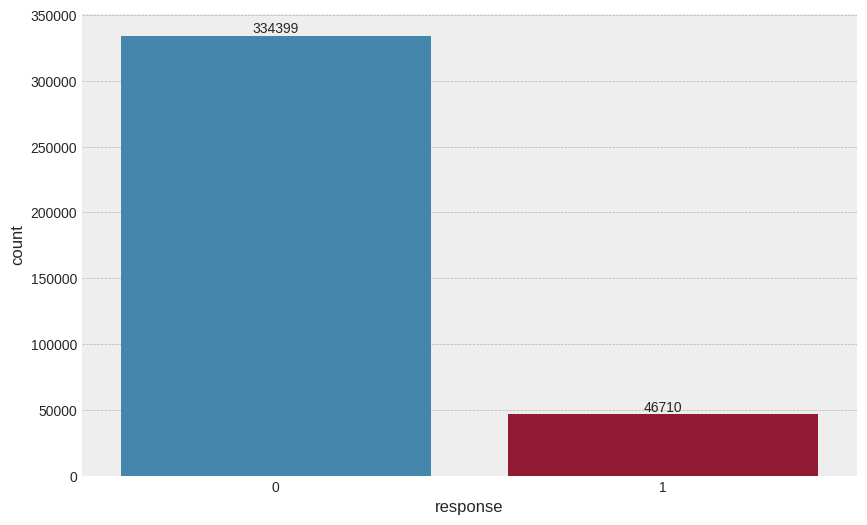

In [14]:
aux1 = df_raw[['id', 'response']].groupby('response').count().reset_index()
# contando os usuarios que responderam sim e não.

aux1 = aux1.rename(columns={'id': 'count'})
# renomeando a coluna

ax = sns.barplot(x= aux1['response'], y= aux1['count'])
ax.bar_label(ax.containers[0]);


In [15]:
print(cat_attributes['gender'].value_counts())

aux1 = df_raw[['id', 'response','gender']].groupby(['gender','response']).count().reset_index()
aux1

Male      206089
Female    175020
Name: gender, dtype: int64


,gender,response,id
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


In [16]:
print(cat_attributes['vehicle_age'].value_counts())

aux2 = df_raw[['id', 'response','vehicle_age']].groupby(['vehicle_age','response']).count().reset_index()
aux2

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: vehicle_age, dtype: int64


,vehicle_age,response,id
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


In [17]:
print(cat_attributes['vehicle_damage'].value_counts())

aux3 = df_raw[['id', 'response','vehicle_damage']].groupby(['vehicle_damage','response']).count().reset_index()
aux3

Yes    192413
No     188696
Name: vehicle_damage, dtype: int64


,vehicle_damage,response,id
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


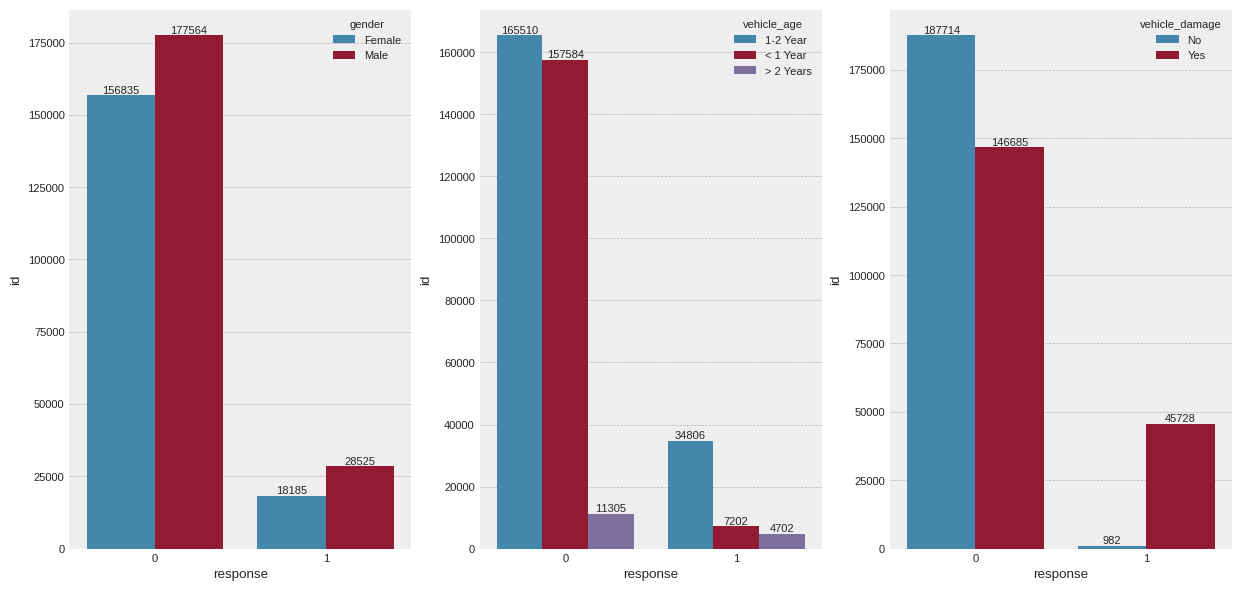

In [18]:
plt.figure(figsize=(15,7))
plt.rcParams['font.size'] = 8

plt.subplot(1,3,1)
ax = sns.barplot(data=aux1, x='response', y='id', hue='gender')
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(1,3,2)
ax1 = sns.barplot(data=aux2, x='response', y='id', hue='vehicle_age')
for container in ax1.containers:
    ax1.bar_label(container)

plt.subplot(1,3,3)
ax2 = sns.barplot(data=aux3, x='response', y='id', hue='vehicle_damage')
for container in ax2.containers:
    ax2.bar_label(container);

**NOTA:**

- Como o conjuntos de dados é desbalanceados, foi realizado uma pequena análise de cada categória de acordo com a sua responta na pesquisa. 
- Tal análise tem como objetivo observar a distribuição dessas variaveis categóricas no conjunto de dados.

**REFERÊNCIAS:**

https://medium.com/@gisely.alves/visualiza%C3%A7%C3%A3o-de-dados-com-seaborn-2fd0defd9adb

https://cesad.ufs.br/ORBI/public/uploadCatalago/09215427022012Bioestatistica_Aula_03.pdf

https://ead.uepg.br/apl/sigma/assets/editais/PS0027E0035.pdf

https://pt.wikipedia.org/wiki/Estat%C3%ADstica_descritiva

## Feature Engineering

In [19]:
df1 = df_raw.copy()

In [20]:
# transformando as colunas region_code e policy_Sales_channel no tipo de variavel inteiro

df1['region_code'] = df1['region_code'].astype(int)
df1['policy_sales_channel'] = df1['policy_sales_channel'].astype(int)

In [21]:
df1['age_group'] = df1.apply(lambda x: 'young' if x['age'] < 25 else
                            'adult' if x['age'] < 45 else
                             'old_adult' if x['age'] < 60 else
                            'old', axis = 1)

**FONTE SOBRE FAIXA ETÁRIA EM SEGURO DE VEICULO:**
- https://www.seguroauto.org/diferenca-de-preco-do-seguro-de-carro-por-faixa-etaria/

In [22]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code               int64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel      int64
vintage                   int64
response                  int64
age_group                object
dtype: object

## EDA - Análise Exploratória dos Dados

In [23]:
df2 = df1.copy()

Nesse primeiro ciclo do CRISP, busco de uma forma geral valida algumas hipoteses e conhecer alguns ponto um pouco mais a fundo notados na análise descritiva.

#### MINDMAP DO NEGÓCIO DE SEGURO DE CARROS

#### HIPOTESES DO NEGÓCIO

**H1:** Automóvel com mais idade o cliente tem menos interesse de obter o seguro.

**H2:** Clientes mais velhos tem mais interesse de obter o seguro

**H3:** Clientes que tem mais tempo ja com a empresa tem mais interesse de obter outro seguro

**H4:** Automóveis que já ocorreu alguma danificação no passado, o dono tem mais interesse de obter o seguro. 

**H5:** 60% dos clientes que não possuem seguro de automoveis tem mais interesse de obter o seguro.


### Univariate Analysis

- Busco conhecer a distribuição dos dados de cada categoria no geral.
- Conhecer a distribuição dos dados dos que respoderam SIM na pesquisa.

In [24]:
df_response = df2.loc[df2['response'] == 1 ,:]

#### Variável resposta (target, alvo)

0    0.877437
1    0.122563
Name: response, dtype: float64


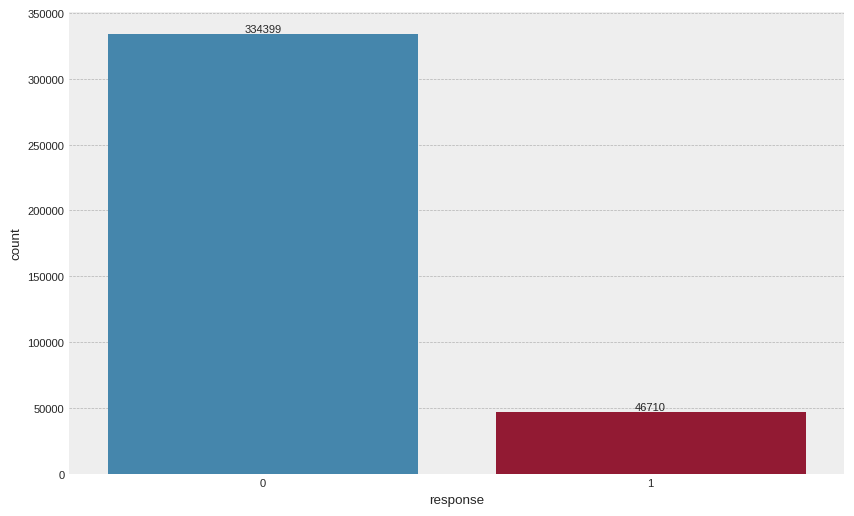

In [25]:
# variavel resposta
distrib_cat(df2, 'response')

**NOTA:**
- Conjunto de dados desbalanceado, onde 87% dos registros obteve resposta negativa para adquirir o novo produto (seguro de carro).

### Age

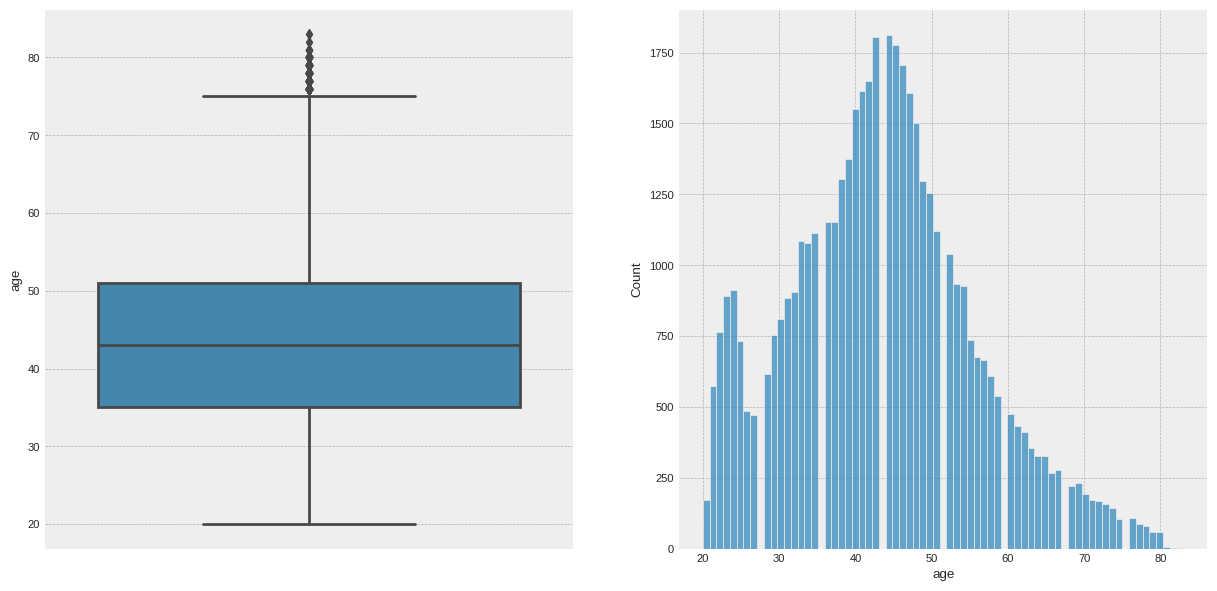

In [26]:
plotvariable(df_response, 'age')

In [27]:
df_response['age'].describe()

count    46710.000000
mean        43.435560
std         12.168924
min         20.000000
25%         35.000000
50%         43.000000
75%         51.000000
max         83.000000
Name: age, dtype: float64

**NOTA:**

- A distribuição dos dados do atributo idade é enviesado à direita.
- Tendo um pico de concentração da idade de 40 a 50 anos.

### Annual_premium

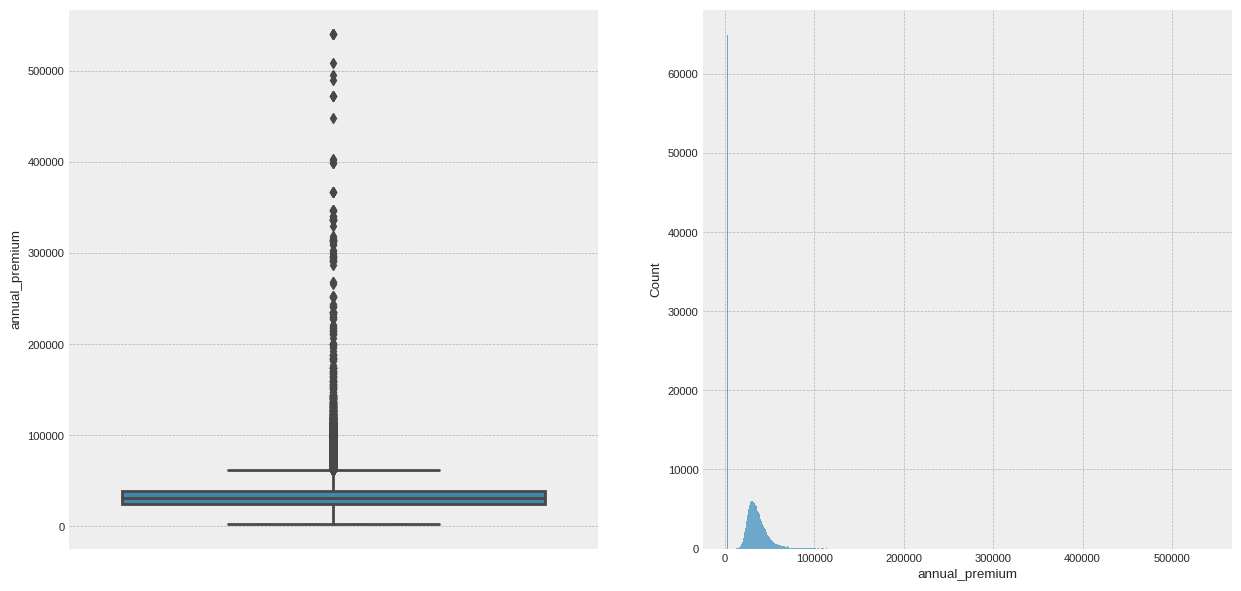

In [28]:
plotvariable(df2, 'annual_premium')

In [29]:
df_response['annual_premium'].describe()

count     46710.000000
mean      31604.092742
std       18646.508040
min        2630.000000
25%       24868.000000
50%       33002.000000
75%       41297.000000
max      540165.000000
Name: annual_premium, dtype: float64

**Entendendo os Outliers**

- O limite superior do boxplot é calculado da seguinte forma:
        LS = Q3 + 1,5 * (Q3 - Q1)
        
- Logo o resultado é:
        LS = 39400 + 1,5 * (39400 - 24405)
        LS = 61892,5

In [30]:
find_limites_boxplot(df_response, 'annual_premium')

'O limite inferior é de 224.5. E o limite superior é de 65940.5'

In [31]:
aux = df_response.loc[df_response['annual_premium'] > 65940.5,:]

In [32]:
aux.shape

(1111, 13)

**NOTA:**

- Mais de 1mil registros que respoderam SIM estão acima do limite superior no que se refere na quantidade que irá pagar pelo seguro de automovel anual.
- Nesse primeiro ciclo do CRISP, vamos mante-los.
- Próximos ciclos, estudar mais afundo sobre esses valores discrepantes e uma forma de trata-los, se vai melhorar o treinamento do modelo.

In [33]:
aux2 = df_response.loc[(df_response['annual_premium'] < 65940.5),:]

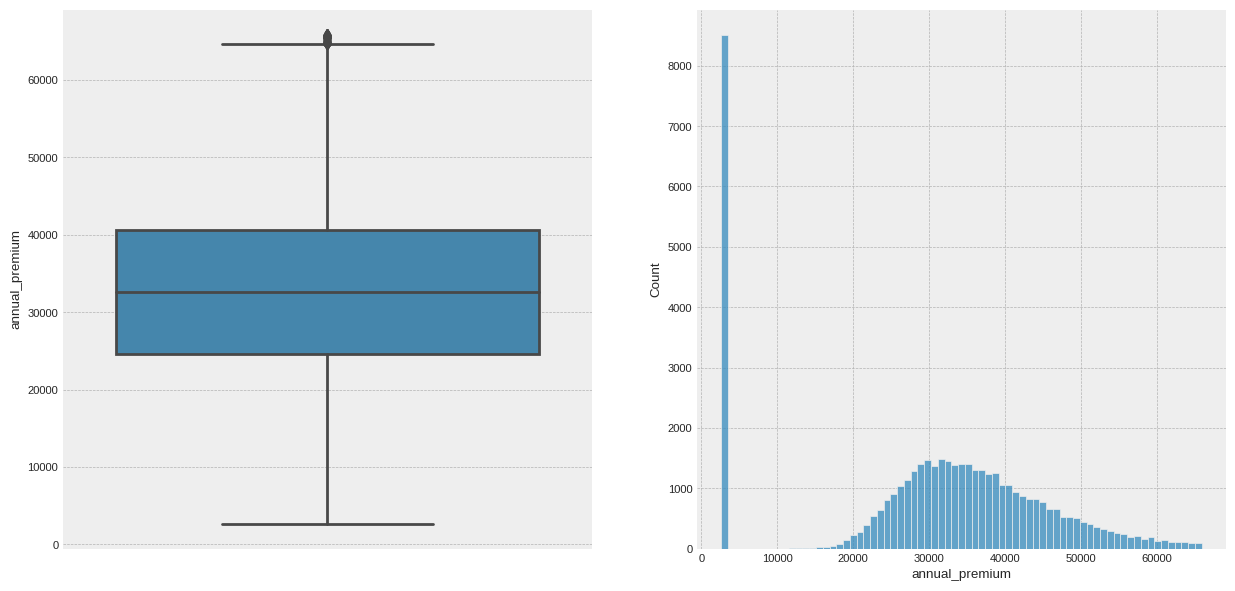

In [34]:
plotvariable(aux2, 'annual_premium')

In [35]:
aux2 = df_response.loc[(df_response['annual_premium'] < 65940.5) & (df_response['annual_premium'] > 10000),:]

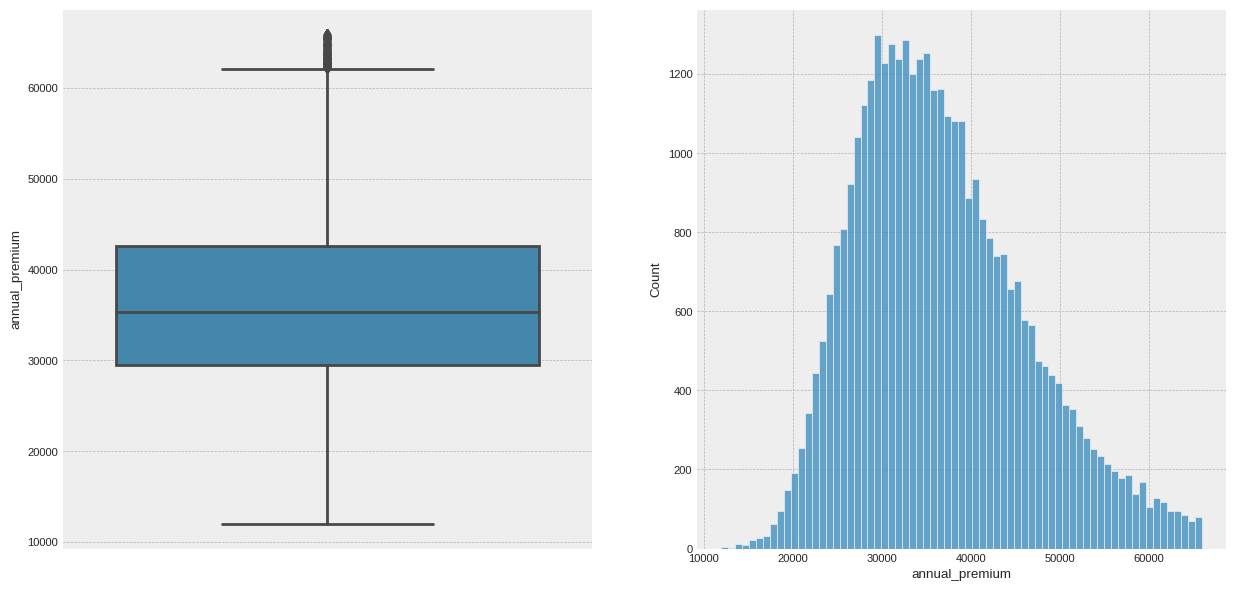

In [36]:
plotvariable(aux2, 'annual_premium')

In [37]:
aux2['annual_premium'].describe()

count    37093.000000
mean     36680.329307
std       9590.831113
min      11979.000000
25%      29542.000000
50%      35349.000000
75%      42581.000000
max      65915.000000
Name: annual_premium, dtype: float64

In [38]:
df_response.shape

(46710, 13)

**NOTA:**
- Dos 46mil registros dos que responderam SIM, retirando os outliers são 37mil.
- Em média, a renda anual dos clientes são de 36mil.

### Vintage

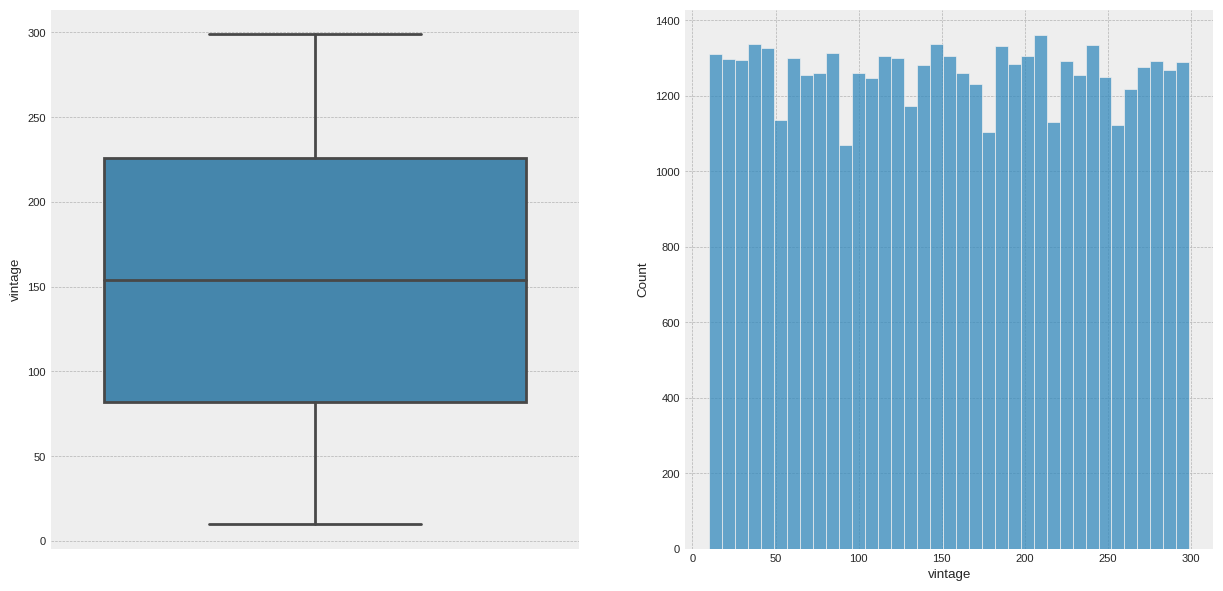

In [39]:
plotvariable(df_response, 'vintage')

**NOTA:**
- Histograma uniforme, significa que os dados são igualmentes distribuidos.
- Ou seja, os registros da variavel vintage possuem a mesma frequencia ou frenquencia próxima. 
- Podemos supor que tal variavél não consegue explicar o fenomeno da variabilidade da variavel resposta.

### Vehicle_damage

Yes    0.504877
No     0.495123
Name: vehicle_damage, dtype: float64


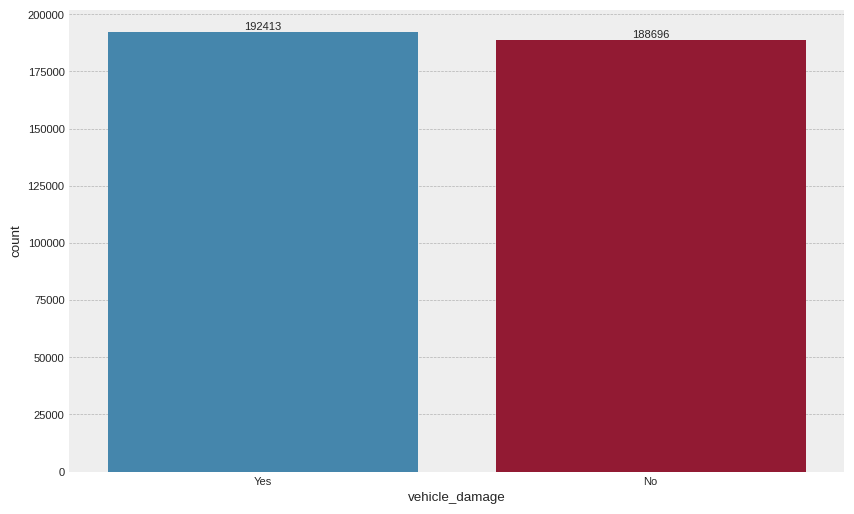

In [40]:
distrib_cat(df2, 'vehicle_damage')

Yes    0.978977
No     0.021023
Name: vehicle_damage, dtype: float64


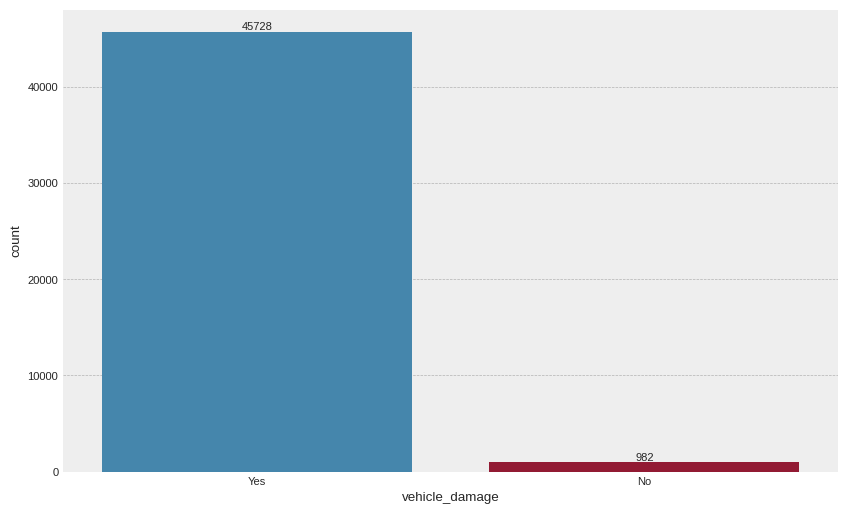

In [41]:
distrib_cat(df_response, 'vehicle_damage')

**NOTA:**
- A distribuição dos registros de cliente que já ou não danificaram o veiculo é o mesmo, estando balanceado.
- Já na distribuição dos clientes que responderam SIM, 97% já tiveram o seu carro danificado. 

### Gender

Male      0.540761
Female    0.459239
Name: gender, dtype: float64


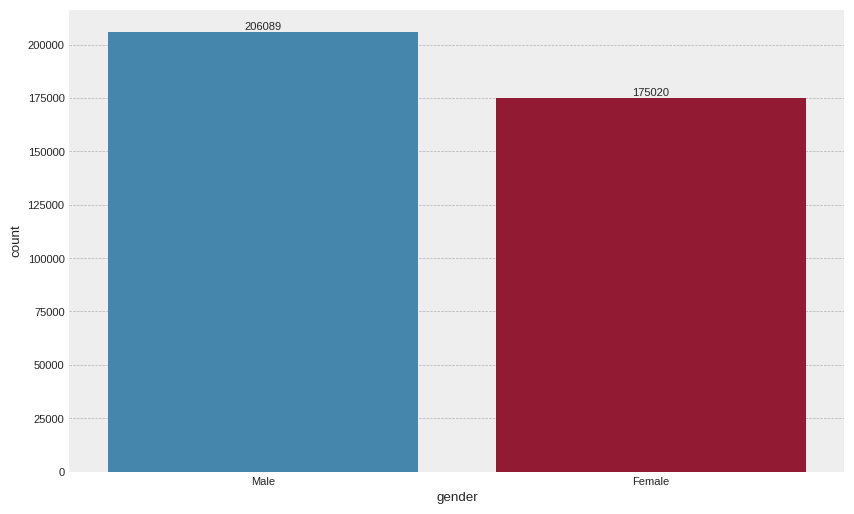

In [42]:
distrib_cat(df2, 'gender')

Male      0.610683
Female    0.389317
Name: gender, dtype: float64


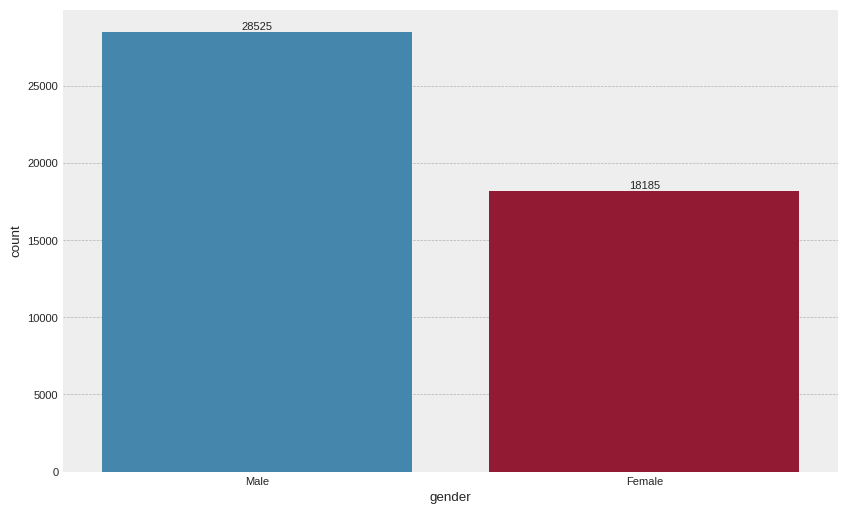

In [43]:
distrib_cat(df_response, 'gender')

**NOTA:**
- Contem 5% de sexo masculino a mais que o sexo feminino no meu conjunto de dados.
- Nos que responderam SIM, 60% são homens.

### Vehicle_age

1-2 Year     0.525613
< 1 Year     0.432385
> 2 Years    0.042001
Name: vehicle_age, dtype: float64


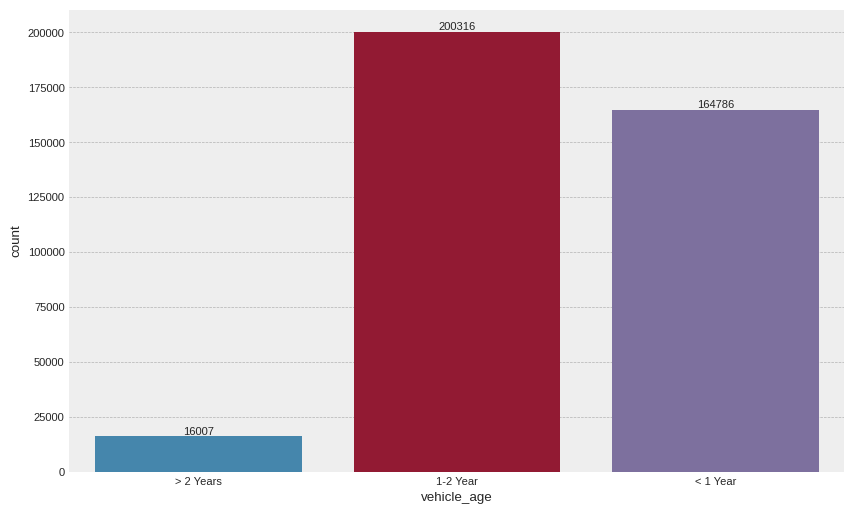

In [44]:
distrib_cat(df2, 'vehicle_age')

1-2 Year     0.745151
< 1 Year     0.154185
> 2 Years    0.100664
Name: vehicle_age, dtype: float64


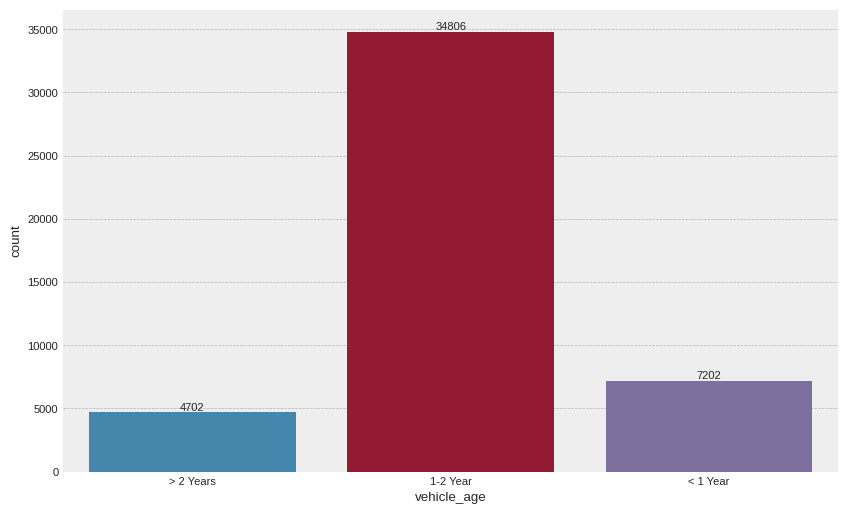

In [45]:
distrib_cat(df_response, 'vehicle_age')

**NOTA:**
- No atributo de idade do veiculo, 4% dos dados se referem a veiculos mais de 2 anos.
- Dos que responderam SIM, a maioria tem veiculo de 1-2 anos.

### driving_license

1    0.997869
0    0.002131
Name: driving_license, dtype: float64


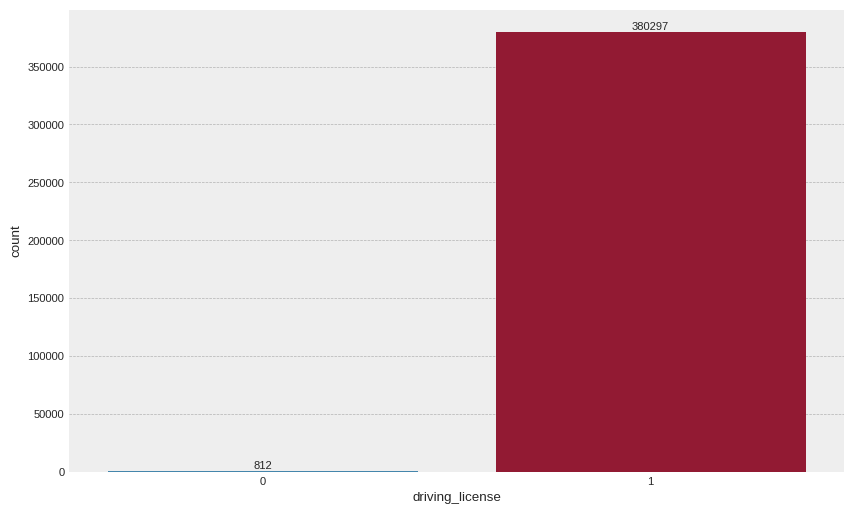

In [46]:
distrib_cat(df2, 'driving_license')

1    0.999122
0    0.000878
Name: driving_license, dtype: float64


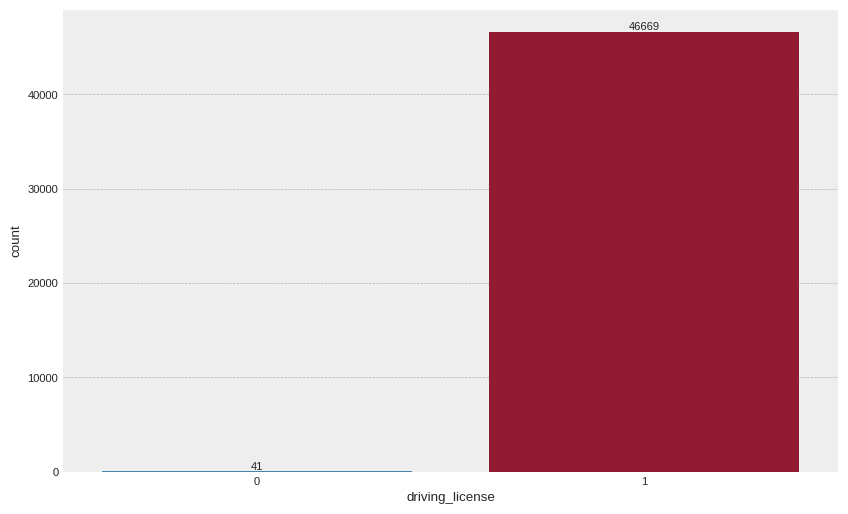

In [47]:
distrib_cat(df_response, 'driving_license')

**NOTA:**
- Apenas 0,2% dos registros não possuem licença para dirigir.

### previously_insured

0    0.54179
1    0.45821
Name: previously_insured, dtype: float64


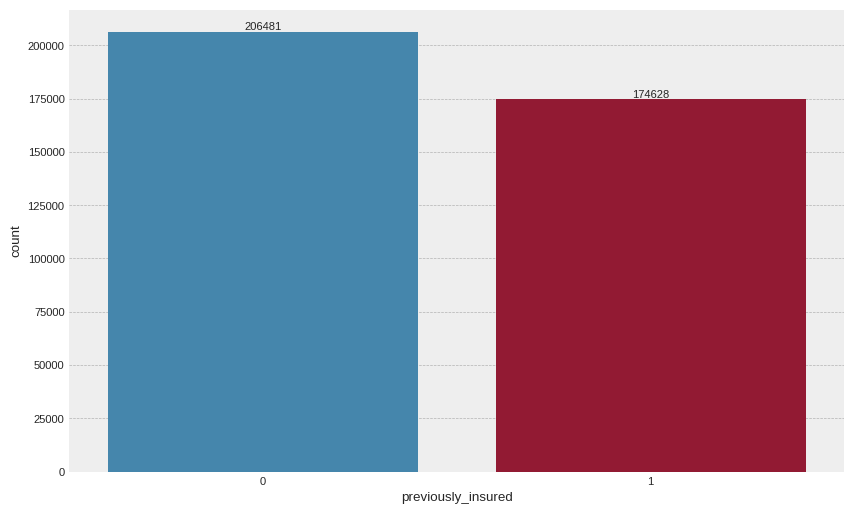

In [48]:
distrib_cat(df2, 'previously_insured')

0    0.996617
1    0.003383
Name: previously_insured, dtype: float64


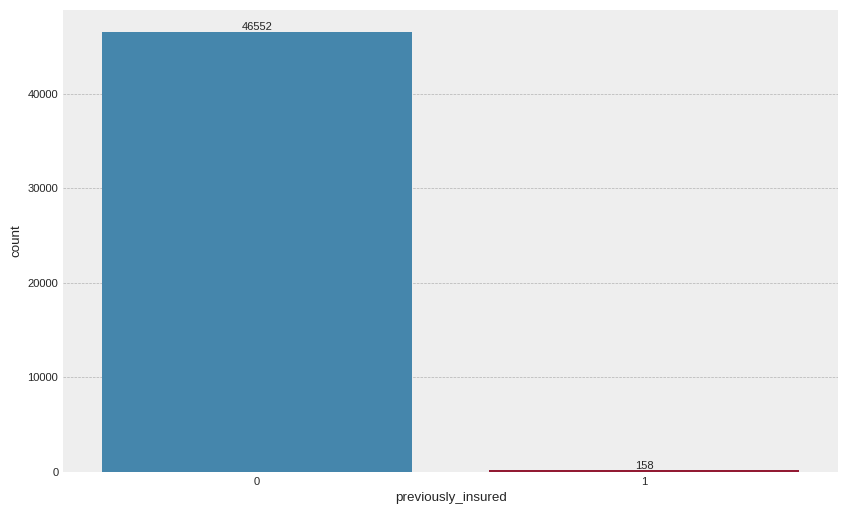

In [49]:
distrib_cat(df_response, 'previously_insured')

**NOTA:**
- 45% dos clientes não possuem seguro de automoveis.
- Dos que respoderam SIM, 99% não possui seguro de automovel. 

### region_code

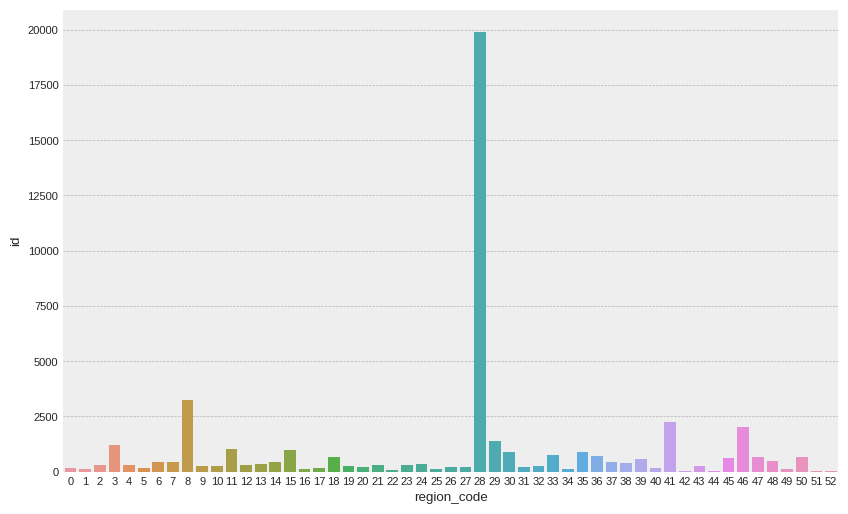

In [50]:
aux = df_response[['region_code', 'id']].groupby('region_code').count().reset_index().sort_values(by='region_code')

sns.barplot(x = aux['region_code'], y = aux['id']);

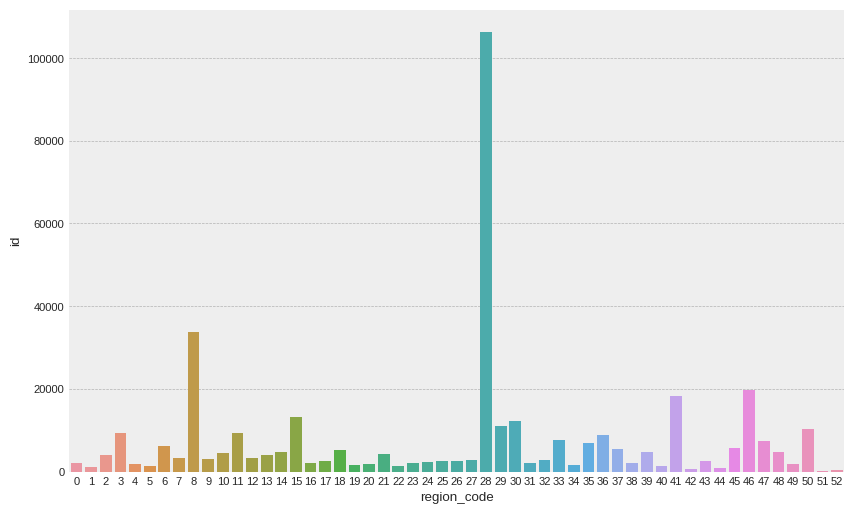

In [51]:
aux = df2[['region_code', 'id']].groupby('region_code').count().reset_index().sort_values(by='region_code')

sns.barplot(x = aux['region_code'], y = aux['id']);

**NOTA:**
- O codigo de região 28 contém mais de 20mil registros dos que responderam SIM no conjunto de dados.
- No conjunto de dados em geral mais 100mil registros são da região 28.

### policy_sales_channel

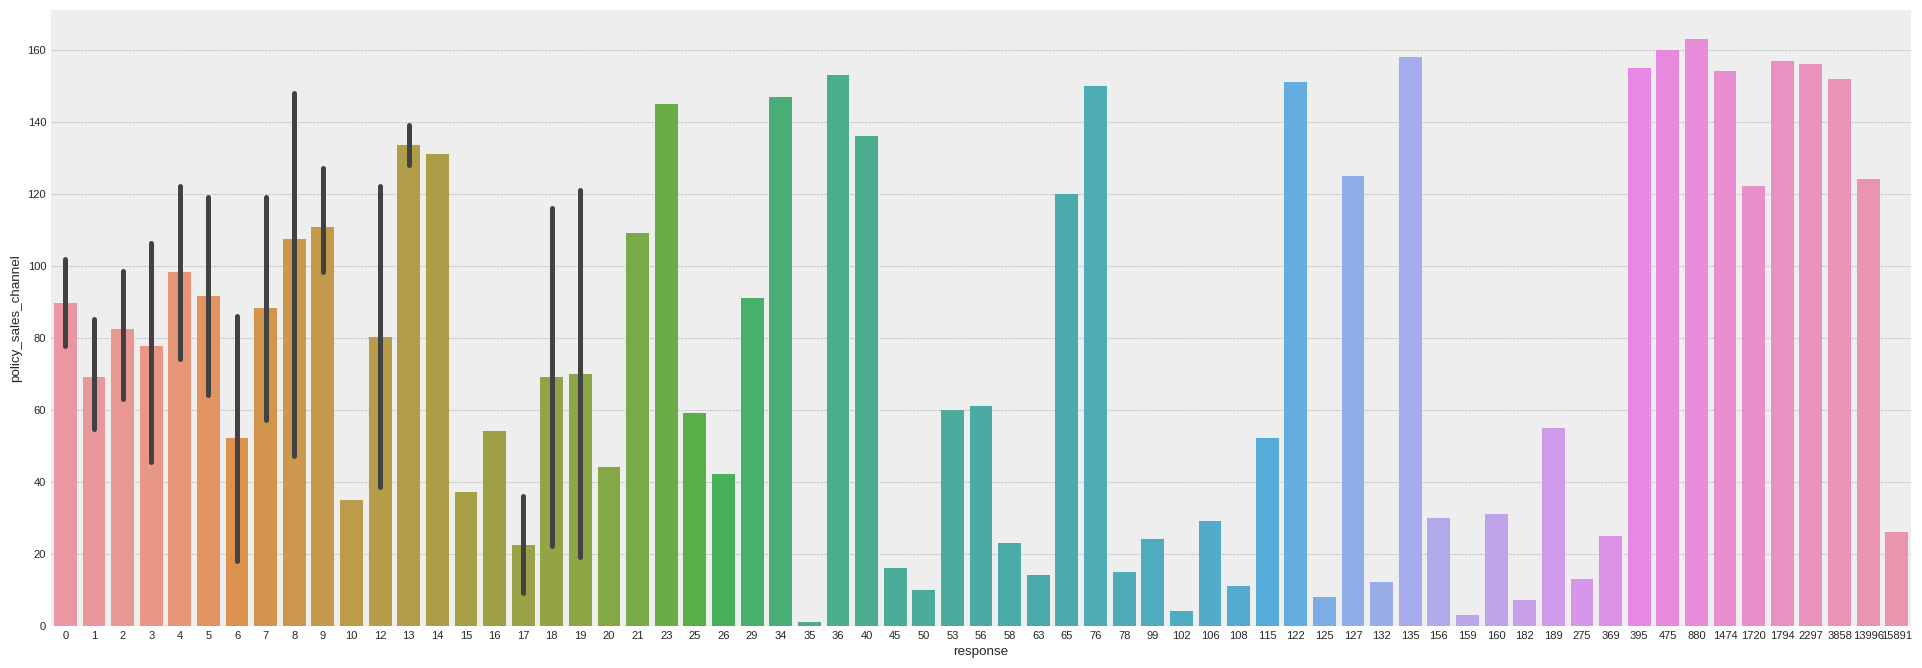

In [52]:
# 'policy_sales_channel'
plt.figure(figsize=(24,8))
aux = df2[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().reset_index()
sns.barplot(data=aux, x='response', y='policy_sales_channel');

**NOTA:**
- A distribuição de codigo anonimo do cliente são variaveis. 

### Bivariate Analysis

- Respondendo algumas hipoteses de negócio.

#### H1: Automóvel com mais idade o cliente tem menos interesse de obter o seguro.

- FALSO
- 30% dos clientes que contem veiculos com mais idade responderam SIM
- O conjunto de dados tem aproximadamente 4% de clientes que o veiculo de mais de 2 anos de idade.
- Dos clientes que responderam SIM, 10% são so clientes que tem veiculos de mais de 2 anos de idade.

Percentual da distribuição da variavel no conjunto de dados:
1-2 Year     0.525613
< 1 Year     0.432385
> 2 Years    0.042001
Name: vehicle_age, dtype: float64


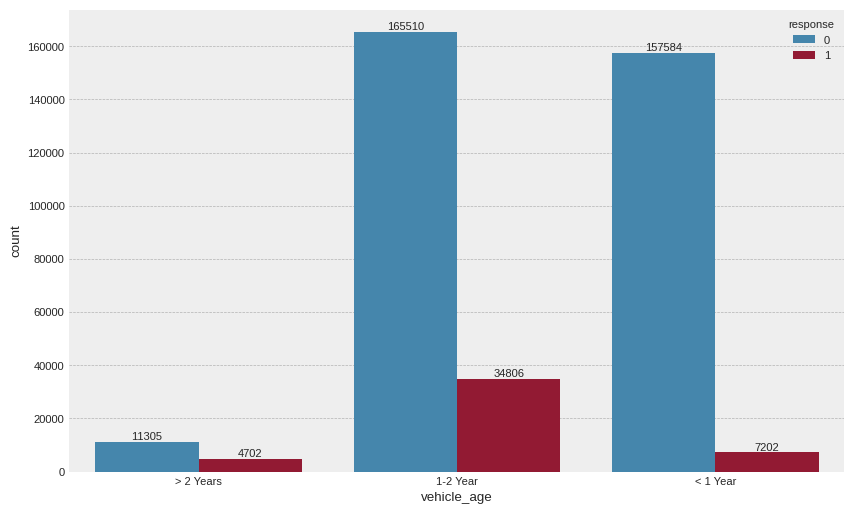

In [53]:
ax = sns.countplot(x= 'vehicle_age', data=df2, hue= 'response' )
for container in ax.containers:
    ax.bar_label(container);
    
print('Percentual da distribuição da variavel no conjunto de dados:')
print(df2['vehicle_age'].value_counts(normalize = True))

**Tabela de contigência:**

- É usada para resumir a distribuição de duas ou mais variaveis categóricas.
- Conhecida também como tabela de frequência cruzada.

In [54]:
tabela = pd.DataFrame({'freq_abs': df2['vehicle_age'].groupby(df2['response']).value_counts(),
                       'freq_rel': df2['vehicle_age'].groupby(df2['response']).value_counts(normalize=True)})
tabela

freq_abs  freq_rel
response vehicle_age                    
0        1-2 Year       165510  0.494948
         < 1 Year       157584  0.471245
         > 2 Years       11305  0.033807
1        1-2 Year        34806  0.745151
         < 1 Year         7202  0.154185
         > 2 Years        4702  0.100664

In [55]:
tabela2 = pd.DataFrame({'freq_abs': df2['response'].groupby(df2['vehicle_age']).value_counts(),
                       'freq_rel': df2['response'].groupby(df2['vehicle_age']).value_counts(normalize=True)})
tabela2

freq_abs  freq_rel
vehicle_age response                    
1-2 Year    0           165510  0.826245
            1            34806  0.173755
< 1 Year    0           157584  0.956295
            1             7202  0.043705
> 2 Years   0            11305  0.706254
            1             4702  0.293746

**NOTA:**
- 30% dos clientes que tem veiculos com mais de 2 anos de idade, responderam SIM.
- 12% dos clientes que tem veiculos entre 1 a 2 anos de idade, responderam SIM.
- 4% dos clientes que tem veiculos menor que 1 ano de idade, responderam SIM.
- Já, em geral, dos clientes que responderam SIM, 10% tem o veiculo mais de 2 anos de idade. 

#### H2: Clientes mais velhos tem mais interesse de obter o seguro

**VERDADEIRO**
- Clientes entre 46 a 60 são os que mais tem interesse em obter o seguro.

Legenda:
   - Young -> Pessoas de 18 a 25 anos.
   - Adult -> 26 a 45 anos.
   - old_adult -> 46 a 60 anos
   - Old -> mais de 60 anos
   
- Pessoas adult e old_adult tem o maior pecentual que responderam SIM.
- Dos adult, 14% responderam SIM.
- Dos Old_adult 19% respondem SIM.
   

In [56]:
print('Percentual da distribuição da variavel no conjunto de dados:')
print(df2['age_group'].value_counts(normalize = True))

Percentual da distribuição da variavel no conjunto de dados:
adult        0.407474
young        0.246305
old_adult    0.223492
old          0.122729
Name: age_group, dtype: float64


In [57]:
tabela2 = pd.DataFrame({'freq_abs': df2['response'].groupby(df2['age_group']).value_counts(),
                       'freq_rel': df2['response'].groupby(df2['age_group']).value_counts(normalize=True)})
tabela2

freq_abs  freq_rel
age_group response                    
adult     0           132943  0.856084
          1            22349  0.143916
old       0            42109  0.900284
          1             4664  0.099716
old_adult 0            68791  0.807643
          1            16384  0.192357
young     0            90556  0.964706
          1             3313  0.035294

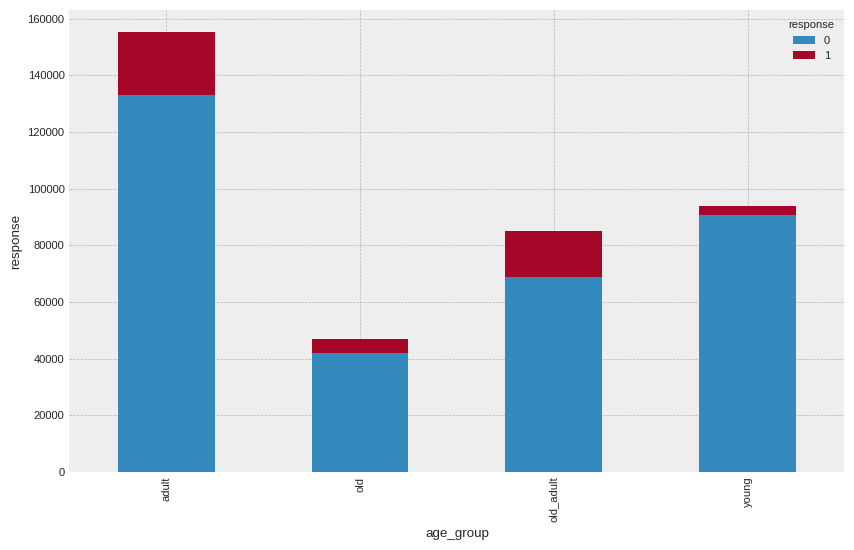

In [58]:
tb = pd.crosstab(df2['age_group'], df2['response'])
tb.plot(kind='bar', stacked=True)
plt.xlabel('age_group')
plt.ylabel('response')

plt.show()

#### H3: Clientes que tem mais tempo ja com a empresa tem mais interesse de obter outro seguro

**FALSO**
- O tempo do cliente na empresa não tem correlação com o interesse ou não em obter o seguro de automovel. 

In [59]:
aux1 = df2.loc[df2['response'] == 0,:]
aux2 = df2.loc[df2['response'] == 1,:]

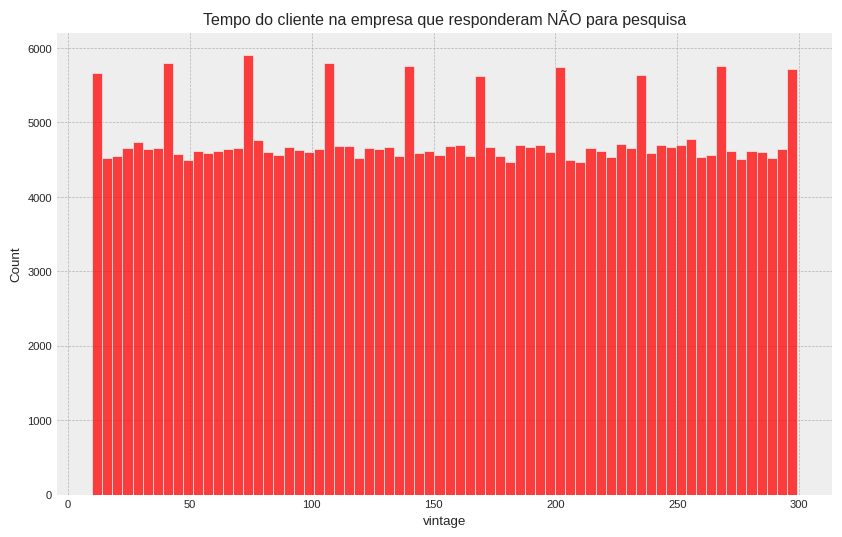

In [60]:
sns.histplot(aux1['vintage'], color='red')

plt.title('Tempo do cliente na empresa que responderam NÃO para pesquisa');

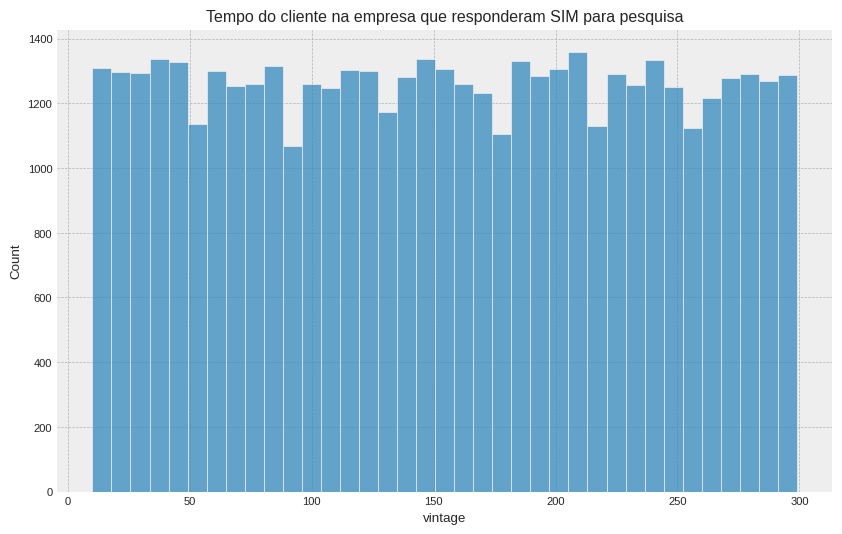

In [61]:
sns.histplot(aux2['vintage'])

plt.title('Tempo do cliente na empresa que responderam SIM para pesquisa');

#### H4: Automóveis que já ocorreu alguma danificação no passado, o dono tem mais interesse de obter o seguro.

**VERDADEIRO:**
- 23% dos que já danificaram o carro tem interesse de obter o seguro.
- Já aqueles que nunca danificaram o carro, 0,5% tem o interesse de obter o seguro. 

In [62]:
tabela2 = pd.DataFrame({'freq_abs': df2['response'].groupby(df2['vehicle_damage']).value_counts(),
                       'freq_rel': df2['response'].groupby(df2['vehicle_damage']).value_counts(normalize=True)})
tabela2

freq_abs  freq_rel
vehicle_damage response                    
No             0           187714  0.994796
               1              982  0.005204
Yes            0           146685  0.762345
               1            45728  0.237655

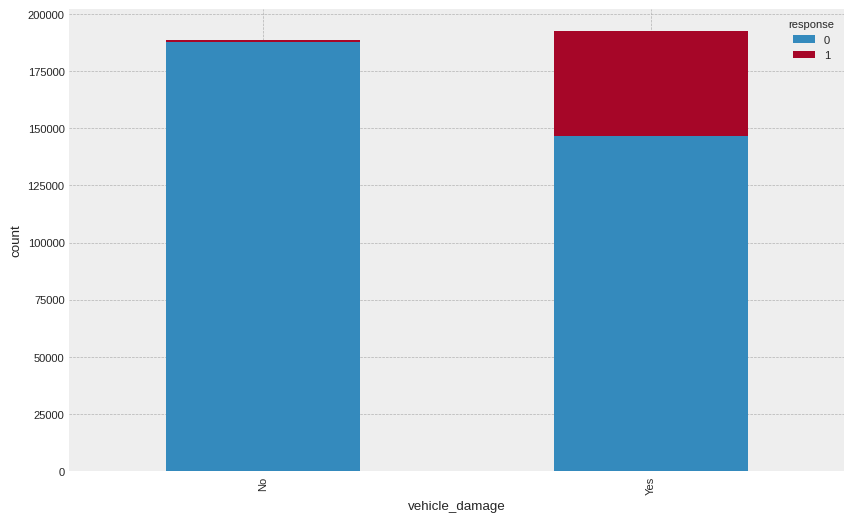

In [63]:
tb = pd.crosstab(df2['vehicle_damage'], df2['response'])
tb.plot(kind='bar', stacked=True)
plt.xlabel('vehicle_damage')
plt.ylabel('count')

plt.show()

**H5: 60% dos clientes que não possuem seguro de automoveis tem mais interesse de obter o seguro.**

**FALSO**
- Dos clientes que não possui seguro, 23% que tem interesse em obter o seguro. 

In [64]:
tabela2 = pd.DataFrame({'freq_abs': df2['response'].groupby(df2['previously_insured']).value_counts(),
                       'freq_rel': df2['response'].groupby(df2['previously_insured']).value_counts(normalize=True)})
tabela2

freq_abs  freq_rel
previously_insured response                    
0                  0           159929  0.774546
                   1            46552  0.225454
1                  0           174470  0.999095
                   1              158  0.000905

### Multivariate  Analysis

In [65]:
df2.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code               int64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel      int64
vintage                   int64
response                  int64
age_group                object
dtype: object

#### Variaveis Numericas

In [66]:
num_attributes = num_attributes.drop(['region_code', 'policy_sales_channel'], axis=1)

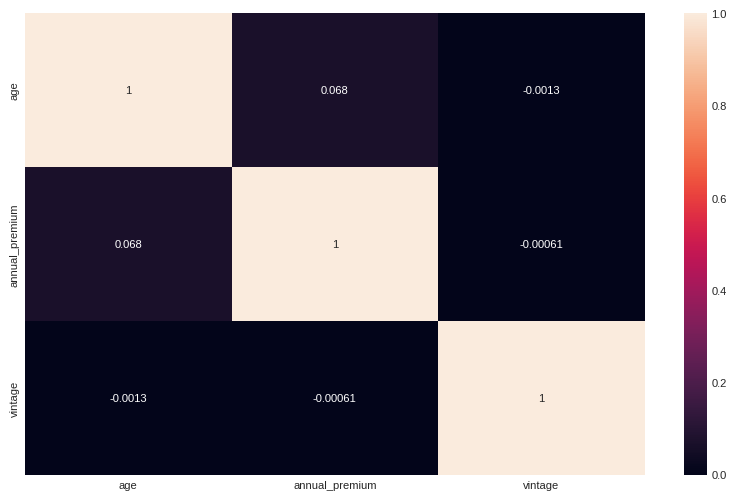

In [67]:
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation, annot=True);

**NOTA**:
- As correlações estão muito próximas de ZERO, significa que não é possível determinar qualquer senso de covariação. No entanto, isso não significa que não haja relação não linear entre as variáveis.

#### Variaveis categoricas

In [68]:
df1_cat = df2[['gender', 'driving_license','previously_insured', 'vehicle_age', 
                         'vehicle_damage', 'region_code', 'policy_sales_channel', 'age_group','response']]

In [ ]:
cat_attributes = ['gender','vehicle_age', 'vehicle_damage', 'driving_license', 
                  'previously_insured', 'region_code', 'policy_sales_channel', 'age_group', 'response']

In [80]:
cramer_total = []

for i in cat_attributes:
    cramer_list = []
    for j in cat_attributes:
        cramer_list.append(cramer_v(df1_cat[i], df1_cat[j]))
    cramer_total.append(cramer_list)
    
df_corr = pd.DataFrame({'gender': cramer_total[0],
                         'vehicle_age': cramer_total[1],
                         'vehicle_damage': cramer_total[2],
                         'driving_license': cramer_total[3],
                         'previously_insured': cramer_total[4],
                         'region_code': cramer_total[5],
                         'policy_sales_channel': cramer_total[6],
                         'age_group': cramer_total[7],
                         'response': cramer_total[8]})


df_corr = df_corr.set_index(df_corr.columns)
df_corr

,gender,vehicle_age,vehicle_damage,driving_license,previously_insured,region_code,policy_sales_channel,age_group,response
gender,0.999996,0.166786,0.091601,0.018317,0.081927,0.068590,0.187424,0.152025,0.052432
vehicle_age,0.166786,1.000003,0.396893,0.040232,0.380903,0.294861,0.622624,0.531599,0.221937
vehicle_damage,0.091601,0.396893,0.999996,0.016565,0.824138,0.231939,0.454455,0.252624,0.354392
driving_license,0.018317,0.040232,0.016565,0.999384,0.014912,0.023141,0.058324,0.089874,0.010068
previously_insured,0.081927,0.380903,0.824138,0.014912,0.999996,0.234494,0.440134,0.243839,0.341163
region_code,0.068590,0.294861,0.231939,0.023141,0.234494,1.000068,0.157944,0.213995,0.138095
policy_sales_channel,0.187424,0.622624,0.454455,0.058324,0.440134,0.157944,1.000202,0.432520,0.263430
age_group,0.152025,0.531599,0.252624,0.089874,0.243839,0.213995,0.432520,1.000004,0.172886
response,0.052432,0.221937,0.354392,0.010068,0.341163,0.138095,0.263430,0.172886,0.999989


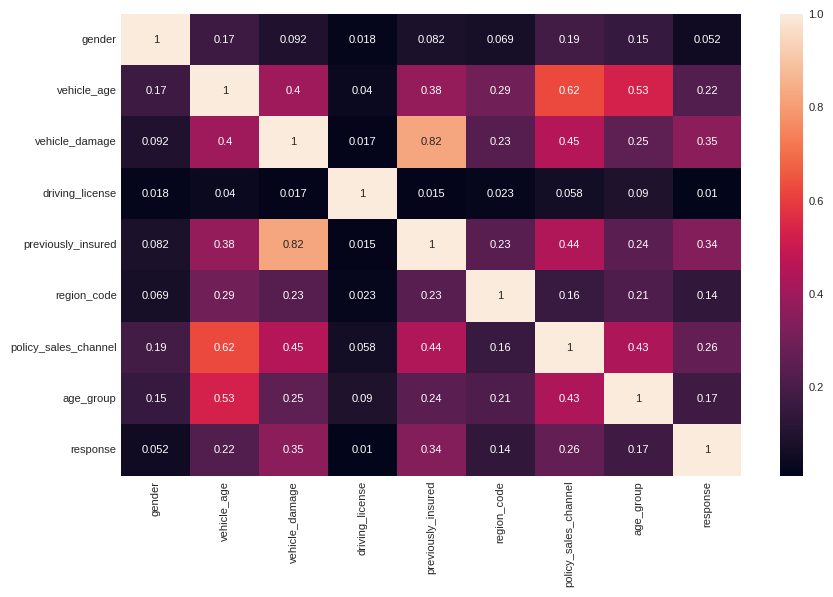

In [81]:
sns.heatmap(df_corr, annot=True);

**NOTA:**

- As correlações das variavies com a variavel Response estão muito próximas de ZERO, significa que não é possível determinar qualquer senso de covariação. No entanto, isso não significa que não haja relação não linear entre as variáveis.